## Overview

This notebook will show you how to create and query a table or DataFrame that you uploaded to DBFS. [DBFS](https://docs.databricks.com/user-guide/dbfs-databricks-file-system.html) is a Databricks File System that allows you to store data for querying inside of Databricks. This notebook assumes that you have a file already inside of DBFS that you would like to read from.

This notebook is written in **Python** so the default cell type is Python. However, you can use different languages by using the `%LANGUAGE` syntax. Python, Scala, SQL, and R are all supported.

In [0]:
# File location and type
file_location = "/FileStore/tables/jaaw_20210824_153015.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)


In [0]:
#rename spark dataframe columns 
df= (df.withColumnRenamed("f_orders.currency","currency")
.withColumnRenamed("f_orders.is_straight_sale","is_straight_sale")
.withColumnRenamed("d_gateways.account_id","gateway")
.withColumnRenamed("f_orders.order_total_raw","order_total")
.withColumnRenamed("f_orders.rebill_depth","rebill_depth")
.withColumnRenamed("d_bins.is_prepaid","is_prepaid_card")
.withColumnRenamed("d_bins.bank","bank")
.withColumnRenamed("d_bins.isocountry","country")
.withColumnRenamed("d_bins.brand","card_brand")
.withColumnRenamed("f_orders.is_approved","is_transaction_approved")
.withColumnRenamed("platform_name","payment_processor"))
# df.columns
#display(df.schema)


In [0]:
# remove unwanted columns : order_id ,  f_orders.transaction_date_date
df_clean = df.select('currency',
 'is_straight_sale',
 'order_total',
 'rebill_depth',
 'is_prepaid_card',
 'bank',
 'country',
 'card_brand',
 'is_transaction_approved',
 'payment_processor')
# split the data in 1/2 to improve speed 
(df_clean, df_clean_part_2)=df_clean.randomSplit([0.3,0.7])
display(df_clean)

currency,is_straight_sale,order_total,rebill_depth,is_prepaid_card,bank,country,card_brand,is_transaction_approved,payment_processor
CAD,No,3.28,0,No,N/A,UNITED STATES,VISA,Yes,optimal
CAD,No,4.22,0,No,STATE BANK OF INDIA,INDIA,MASTERCARD,No,tsys
CAD,No,6.55,0,No,BANK OF AMERICA,UNITED STATES,VISA,No,optimal
CAD,No,6.55,0,No,BANK OF AMERICA,UNITED STATES,VISA,Yes,optimal
CAD,No,6.55,0,No,"BANK OF AMERICA, N.A.",UNITED STATES,VISA,No,optimal
CAD,No,6.55,0,No,BANK OF MONTREAL,CANADA,MASTERCARD,Yes,optimal
CAD,No,6.55,0,No,CANADIAN IMPERIAL BANK OF COMMERCE,CANADA,VISA,No,optimal
CAD,No,6.55,0,No,CANADIAN IMPERIAL BANK OF COMMERCE,CANADA,VISA,Yes,optimal
CAD,No,6.55,0,No,CAPITAL ONE BANK (CANADA BRANCH),CANADA,MASTERCARD,Yes,optimal
CAD,No,6.55,0,No,"CAPITAL ONE BANK (USA), N.A.",UNITED STATES,VISA,Yes,optimal


In [0]:
# df_clean = df_clean.withColumn("one_time_sale",when(col("is_straight_sale") == 'No', 0).otherwise(1))
# import org.apache.spark.sql.functions
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lit
from pyspark.sql.types import StructType, StructField, StringType,IntegerType
from pyspark.sql.functions import when, lit

# Feature engineering and binary converstion 

df_clean = df_clean.withColumn("one_time_sale", when(col("is_straight_sale") == "No",0).when(col("is_straight_sale") == "Yes",1).otherwise(2))
df_clean = df_clean.withColumn("card_is_prepaid", when(col("is_prepaid_card") == "No",0).when(col("is_prepaid_card") == "Yes",1).otherwise(2))
df_clean = df_clean.withColumn("transaction_approved", when(col("is_transaction_approved") == "No",0).when(col("is_transaction_approved") == "Yes",1).otherwise(2))

df_clean = df_clean.select('currency',
 'one_time_sale',
 'order_total',
 'rebill_depth',
 'card_is_prepaid',
 'bank',
 'country',
 'card_brand',
 'transaction_approved',
 'payment_processor')

display(df_clean)


currency,one_time_sale,order_total,rebill_depth,card_is_prepaid,bank,country,card_brand,transaction_approved,payment_processor
CAD,0,3.28,0,0,N/A,UNITED STATES,VISA,1,optimal
CAD,0,4.22,0,0,STATE BANK OF INDIA,INDIA,MASTERCARD,0,tsys
CAD,0,6.55,0,0,BANK OF AMERICA,UNITED STATES,VISA,0,optimal
CAD,0,6.55,0,0,BANK OF AMERICA,UNITED STATES,VISA,1,optimal
CAD,0,6.55,0,0,"BANK OF AMERICA, N.A.",UNITED STATES,VISA,0,optimal
CAD,0,6.55,0,0,BANK OF MONTREAL,CANADA,MASTERCARD,1,optimal
CAD,0,6.55,0,0,CANADIAN IMPERIAL BANK OF COMMERCE,CANADA,VISA,0,optimal
CAD,0,6.55,0,0,CANADIAN IMPERIAL BANK OF COMMERCE,CANADA,VISA,1,optimal
CAD,0,6.55,0,0,CAPITAL ONE BANK (CANADA BRANCH),CANADA,MASTERCARD,1,optimal
CAD,0,6.55,0,0,"CAPITAL ONE BANK (USA), N.A.",UNITED STATES,VISA,1,optimal


In [0]:
dropped_processors = ['echeck','fdmsgn', 'fdmscomp', 'litlev2',
       'payon', 'wirecard', 'optimal', 'jetpay', 'beanstrm',
       'test_cc', 'test_ck', 'test_cs', 'paysafe', 'ntnlmrch', 'fdmsgn2',
       'payvsn', 'checkout', 'bluesnap', 'ecorepay', 'pfpropay', 'piv_g1',
       'evo']

df_clean = df_clean[~df_clean['payment_processor'].isin(dropped_processors)]
display(df_clean)

currency,one_time_sale,order_total,rebill_depth,card_is_prepaid,bank,country,card_brand,transaction_approved,payment_processor
CAD,0,4.22,0,0,STATE BANK OF INDIA,INDIA,MASTERCARD,0,tsys
CAD,0,35.24,8,0,COMMONWEALTH BANK OF AUSTRALIA,AUSTRALIA,MASTERCARD,1,tsys
GBP,0,3.95,0,1,"THINK MONEY, LTD.",UNITED KINGDOM,MASTERCARD,1,tsys
GBP,0,4.95,0,0,BANK OF SCOTLAND PLC,UNITED KINGDOM,VISA,0,tsys
GBP,0,4.95,0,0,BARCLAYS BANK PLC,UNITED KINGDOM,VISA,1,tsys
GBP,0,4.95,0,0,BARCLAYS BANK PLC,UNITED KINGDOM,VISA,1,tsys
GBP,0,4.95,0,0,BARCLAYS BANK PLC,UNITED KINGDOM,VISA,1,tsys
GBP,0,4.95,0,0,CLYDESDALE BANK PLC,UNITED KINGDOM,MASTERCARD,1,tsys
GBP,0,4.95,0,0,"CREATION FINANCIAL SERVICES, LTD.",UNITED KINGDOM,MASTERCARD,0,tsys
GBP,0,4.95,0,0,HALIFAX PLC,UNITED KINGDOM,VISA,0,tsys


In [0]:
# Create a view or table

temp_table_name = "dataset"

df_clean.createOrReplaceTempView(temp_table_name)

In [0]:
#display(df_clean.na)

In [0]:
########### building the pipeline  ########################## 

# Import the required libraries

from pyspark.ml.classification import DecisionTreeClassifier, GBTClassifier
from pyspark.ml.feature import VectorAssembler, StringIndexer, IndexToString, OneHotEncoder
from pyspark.ml import Pipeline


#convert categorical columns to indexes 

categoricalCols = ['currency', 'bank', 'country', 'card_brand']
numericCols = ['one_time_sale', 'order_total', 'rebill_depth', 'card_is_prepaid', 'transaction_approved']

stages = [] # stages in the Pipeline
for categoricalCol in categoricalCols:
    # Category indexing with StringIndexer
    stringIndexer = StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol + "Index").setHandleInvalid("keep").fit(df_clean)   ## Added the sethandleinvalid part # added .fit(df_clean)   

# Add stages.  These are not run here, but will run all at once later on.
stages += [stringIndexer]   
# Convert label (payment_processor) into labeled indices using the StringIndexer
labelIndexer = StringIndexer(inputCol="payment_processor", outputCol="indexedlabel").fit(df_clean)   # added .fit(df_clean)
# add as a step to the pipeline stages
stages += [labelIndexer]

# Transform all features into a vector using VectorAssembler
# Vector assembler is used to create a vector of input features

assemblerInputs = [c + "Index" for c in categoricalCols] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [0]:
# Setup the pipeline with the different stages up to this point 
partialPipeline = Pipeline().setStages(stages)
pipelineModel = partialPipeline.fit(df_clean)
df_prepped = pipelineModel.transform(df_clean)
display(df_prepped)
df_prepped.columns

Out[12]: ['currency',
 'one_time_sale',
 'order_total',
 'rebill_depth',
 'card_is_prepaid',
 'bank',
 'country',
 'card_brand',
 'transaction_approved',
 'payment_processor',
 'currencyIndex',
 'bankIndex',
 'countryIndex',
 'card_brandIndex',
 'indexedlabel',
 'features']

currency,one_time_sale,order_total,rebill_depth,card_is_prepaid,bank,country,card_brand,transaction_approved,payment_processor,currencyIndex,bankIndex,countryIndex,card_brandIndex,indexedlabel,features
CAD,0,4.22,0,0,STATE BANK OF INDIA,INDIA,MASTERCARD,0,tsys,2.0,1685.0,23.0,1.0,0.0,"Map(vectorType -> dense, length -> 9, values -> List(2.0, 1685.0, 23.0, 1.0, 0.0, 4.22, 0.0, 0.0, 0.0))"
CAD,0,35.24,8,0,COMMONWEALTH BANK OF AUSTRALIA,AUSTRALIA,MASTERCARD,1,tsys,2.0,129.0,5.0,1.0,0.0,"Map(vectorType -> dense, length -> 9, values -> List(2.0, 129.0, 5.0, 1.0, 0.0, 35.24, 8.0, 0.0, 1.0))"
GBP,0,3.95,0,1,"THINK MONEY, LTD.",UNITED KINGDOM,MASTERCARD,1,tsys,1.0,2255.0,4.0,1.0,0.0,"Map(vectorType -> dense, length -> 9, values -> List(1.0, 2255.0, 4.0, 1.0, 0.0, 3.95, 0.0, 1.0, 1.0))"
GBP,0,4.95,0,0,BANK OF SCOTLAND PLC,UNITED KINGDOM,VISA,0,tsys,1.0,314.0,4.0,0.0,0.0,"Map(vectorType -> sparse, length -> 9, indices -> List(0, 1, 2, 5), values -> List(1.0, 314.0, 4.0, 4.95))"
GBP,0,4.95,0,0,BARCLAYS BANK PLC,UNITED KINGDOM,VISA,1,tsys,1.0,140.0,4.0,0.0,0.0,"Map(vectorType -> dense, length -> 9, values -> List(1.0, 140.0, 4.0, 0.0, 0.0, 4.95, 0.0, 0.0, 1.0))"
GBP,0,4.95,0,0,BARCLAYS BANK PLC,UNITED KINGDOM,VISA,1,tsys,1.0,140.0,4.0,0.0,0.0,"Map(vectorType -> dense, length -> 9, values -> List(1.0, 140.0, 4.0, 0.0, 0.0, 4.95, 0.0, 0.0, 1.0))"
GBP,0,4.95,0,0,BARCLAYS BANK PLC,UNITED KINGDOM,VISA,1,tsys,1.0,140.0,4.0,0.0,0.0,"Map(vectorType -> dense, length -> 9, values -> List(1.0, 140.0, 4.0, 0.0, 0.0, 4.95, 0.0, 0.0, 1.0))"
GBP,0,4.95,0,0,CLYDESDALE BANK PLC,UNITED KINGDOM,MASTERCARD,1,tsys,1.0,875.0,4.0,1.0,0.0,"Map(vectorType -> dense, length -> 9, values -> List(1.0, 875.0, 4.0, 1.0, 0.0, 4.95, 0.0, 0.0, 1.0))"
GBP,0,4.95,0,0,"CREATION FINANCIAL SERVICES, LTD.",UNITED KINGDOM,MASTERCARD,0,tsys,1.0,2488.0,4.0,1.0,0.0,"Map(vectorType -> dense, length -> 9, values -> List(1.0, 2488.0, 4.0, 1.0, 0.0, 4.95, 0.0, 0.0, 0.0))"
GBP,0,4.95,0,0,HALIFAX PLC,UNITED KINGDOM,VISA,0,tsys,1.0,418.0,4.0,0.0,0.0,"Map(vectorType -> sparse, length -> 9, indices -> List(0, 1, 2, 5), values -> List(1.0, 418.0, 4.0, 4.95))"


In [0]:
## Split the dataset 

(train, test)=df_prepped.randomSplit([0.7,0.3])


In [0]:
# Choose a classification model : https://spark.apache.org/docs/latest/ml-classification-regression.html#gradient-boosted-tree-classifier
# Create an object for the decision tree model
# Use the parameter maxBins and assign a value that is equal to or more than the number of categories in any single feature
from pyspark.ml.classification import GBTClassifier
dt_model = DecisionTreeClassifier(labelCol='indexedlabel',featuresCol="features", maxBins=10000)
#dt_model = GBTClassifier(labelCol="indexedLabel", featuresCol="features", maxIter=10)
##############   stages += [dt_model]

# Convert indexed labels back to original labels.
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel", labels=labelIndexer.labels)
#####   stages += [labelConverter]

In [0]:
# Pipeline is used to pass the data through indexer and assembler simultaneously. Also, it helps to pre-rocess the test data
# in the same way as that of the train data
pipeline_2 = Pipeline(stages=[dt_model, labelConverter])

In [0]:
# Fit the model on the train dataset in one step 

fit_model=pipeline_2.fit(train)

# Fit the model on the train dataset in multiple steps to troubleshoot 



## see this link : https://towardsdatascience.com/productionising-ml-projects-with-google-bigquery-and-pyspark-predicting-hotel-cancellations-8bf94fdc4af


In [0]:
# Store the results in a dataframe

predictions = fit_model.transform(test)
# Select example rows to display.
predictions.select("predictedLabel", "payment_processor", "features").show(100)

+--------------+-----------------+--------------------+
|predictedLabel|payment_processor|            features|
+--------------+-----------------+--------------------+
|          tsys|             tsys|[2.0,1685.0,23.0,...|
|          tsys|             tsys|[1.0,2488.0,4.0,1...|
|      psfconty|             tsys|(9,[0,1,2,5],[1.0...|
|      psfconty|             tsys|[1.0,511.0,4.0,1....|
|          tsys|             tsys|(9,[0,1,2,5],[1.0...|
|          tsys|             fdms|[1.0,140.0,4.0,0....|
|          tsys|             tsys|[1.0,1764.0,4.0,1...|
|          tsys|            fdmso|[1.0,146.0,4.0,0....|
|          tsys|             fdms|(9,[0,1,2,5],[1.0...|
|          tsys|             tsys|(9,[0,1,2,5],[1.0...|
|          tsys|             tsys|[1.0,140.0,4.0,0....|
|          tsys|             tsys|[1.0,13.0,1.0,1.0...|
|          tsys|             tsys|[1.0,8.0,1.0,1.0,...|
|          tsys|             tsys|[1.0,8.0,1.0,1.0,...|
|          tsys|             tsys|[1.0,8.0,1.0,1

In [0]:
# Evaluating the model
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedlabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
#print("Test Error = %g" % (1.0 - accuracy))
print("accuracy = %g" % (accuracy))




accuracy = 0.657713


In [0]:
#alternative method 


In [0]:
#rfModel = model.stages[2]
#print(rfModel)  # summary only



from sklearn.metrics import confusion_matrix


y_test = predictions.select("payment_processor")
y_test = y_test.toPandas()


y_pred = predictions.select("predictedLabel")
y_pred = y_pred.toPandas()

In [0]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
y_test.payment_processor.unique()

Out[22]: array(['tsys', 'fdms', 'fdmso', 'psfconty', 'pmtampa', 'epx', 'global',
       'vantiv', 'elavon', 'internal'], dtype=object)

Out[44]: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f61382fc1f0>

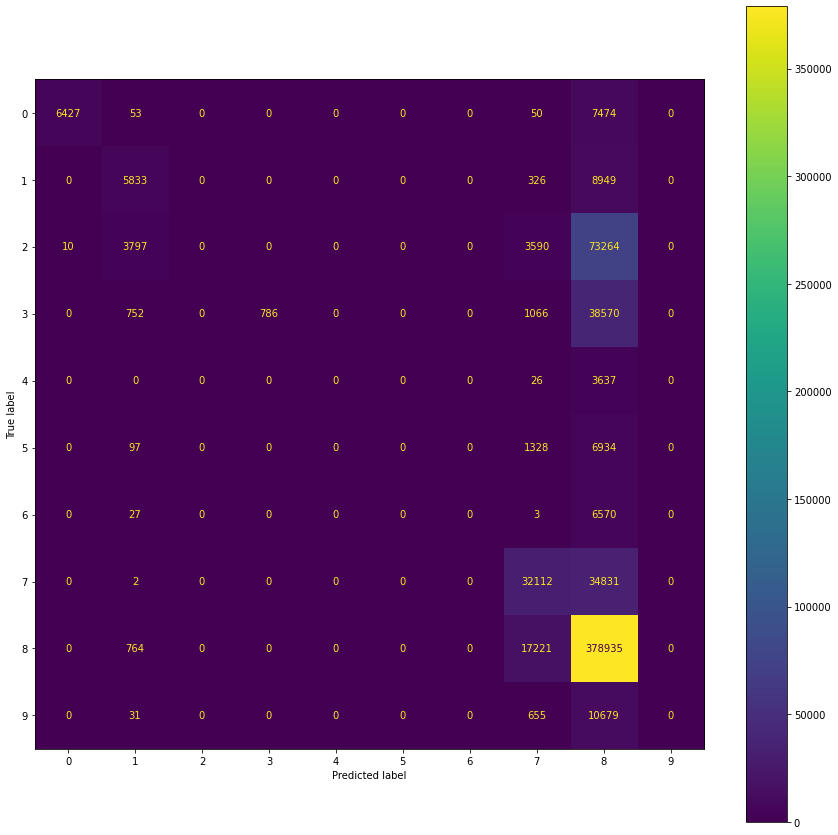

In [0]:
# plot dtree confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# build a dtree confusion matrix with labels
dtree_conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=dtree_conf_matrix)

fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)

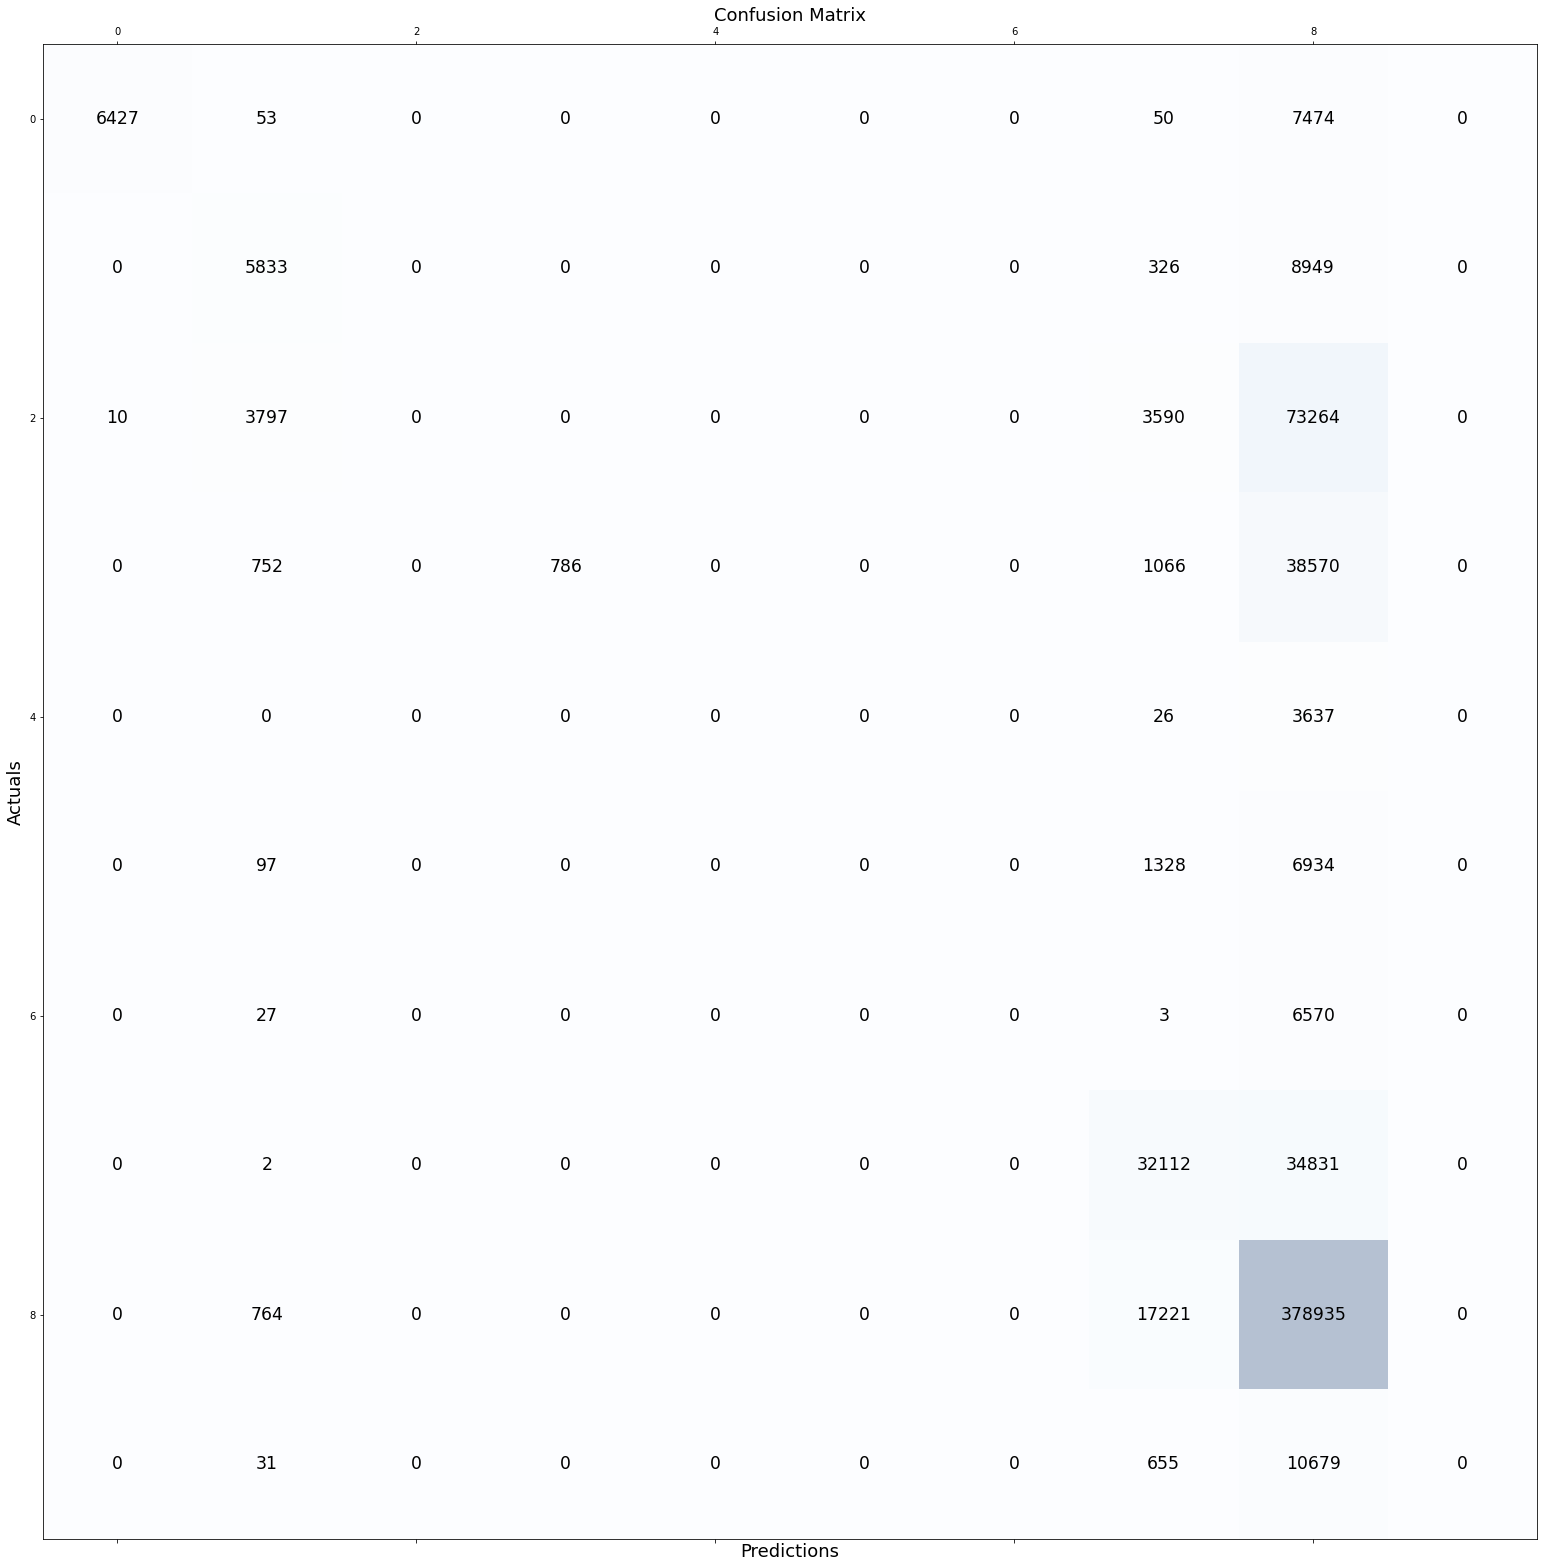

In [0]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(27.5, 27.5))
ax.matshow(dtree_conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(dtree_conf_matrix.shape[0]):
    for j in range(dtree_conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=dtree_conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [0]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['tsys', 'fdms', 'fdmso', 'psfconty', 'epx', 'elavon', 'vantiv',
       'global', 'pmtampa', 'internal']))

Confusion Matrix

[[  6427     53      0      0      0      0      0     50   7474      0]
 [     0   5833      0      0      0      0      0    326   8949      0]
 [    10   3797      0      0      0      0      0   3590  73264      0]
 [     0    752      0    786      0      0      0   1066  38570      0]
 [     0      0      0      0      0      0      0     26   3637      0]
 [     0     97      0      0      0      0      0   1328   6934      0]
 [     0     27      0      0      0      0      0      3   6570      0]
 [     0      2      0      0      0      0      0  32112  34831      0]
 [     0    764      0      0      0      0      0  17221 378935      0]
 [     0     31      0      0      0      0      0    655  10679      0]]

Accuracy: 0.66

Micro Precision: 0.66
Micro Recall: 0.66
Micro F1-score: 0.66

/databricks/python/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels wit